In [2]:
import polars as pl

In [3]:
pitching = pl. read_csv("./Data/lahman_1871-2023_csv/Pitching.csv")
pitching.head()

playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2004,1,"""SFN""","""NL""",1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0,0,2,0,61,5,8,0,1,1
"""aardsda01""",2006,1,"""CHN""","""NL""",3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0,1,1,0,225,9,25,1,3,2
"""aardsda01""",2007,1,"""CHA""","""AL""",2,1,25,0,0,0,0,97,39,23,4,17,36,0.3,6.4,3,2,1,0,151,7,24,2,1,1
"""aardsda01""",2008,1,"""BOS""","""AL""",4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2,3,5,0,228,7,32,3,2,4
"""aardsda01""",2009,1,"""SEA""","""AL""",3,6,73,0,0,0,38,214,49,20,4,34,80,0.19,2.52,3,2,0,0,296,53,23,2,1,2


In [1]:
import pandas as pd
pitching = pd.read_csv("./Data/lahman_1871-2023_csv/Pitching.csv")
modern_pitching = pitching[pitching['yearID'] >= 1946]
grouped_era = modern_pitching.groupby(['yearID', 'lgID']).agg({
    'ER': 'sum',   
    'IPouts': 'sum'  
}).reset_index()
grouped_era['ERA'] = (grouped_era['ER'] / grouped_era['IPouts']) * 27
print(grouped_era.head())
grouped_era.to_csv('./Data/league_wide_ERA.csv', index=False)


   yearID lgID    ER  IPouts       ERA
0    1946   AL  4306   33186  3.503345
1    1946   NL  4202   33254  3.411740
2    1947   AL  4560   33228  3.705309
3    1947   NL  4956   32902  4.066987
4    1948   AL  5223   32929  4.282578


In [6]:
def dh_rule(year, league):
    if league == 'AL' and year >= 1973:
        return 'AL_with_DH'
    elif league == 'NL' and year >= 2022:
        return 'NL_with_DH'
    else:
        return 'No_DH'
grouped_era['DH_rule'] = grouped_era.apply(lambda row: dh_rule(row['yearID'], row['lgID']), axis=1)
grouped_era.to_csv('./Data/league_wide_ERA_with_DH.csv', index=False)
print(grouped_era.head())


   yearID lgID    ER  IPouts       ERA DH_rule
0    1946   AL  4306   33186  3.503345   No_DH
1    1946   NL  4202   33254  3.411740   No_DH
2    1947   AL  4560   33228  3.705309   No_DH
3    1947   NL  4956   32902  4.066987   No_DH
4    1948   AL  5223   32929  4.282578   No_DH


In [7]:
batting = pd.read_csv("./Data/lahman_1871-2023_csv/Batting.csv")
batting['1B'] = batting['H'] - (batting['2B'] + batting['3B'] + batting['HR'])
grouped_slg = batting.groupby(['yearID', 'lgID']).agg({
    '1B': 'sum',
    '2B': 'sum',
    '3B': 'sum',
    'HR': 'sum',
    'AB': 'sum'  
}).reset_index()
grouped_slg['Total_Bases'] = (grouped_slg['1B'] + 
                              2 * grouped_slg['2B'] + 
                              3 * grouped_slg['3B'] + 
                              4 * grouped_slg['HR'])

grouped_slg['SLG'] = grouped_slg['Total_Bases'] / grouped_slg['AB']
grouped_slg['DH_rule'] = grouped_slg.apply(lambda row: dh_rule(row['yearID'], row['lgID']), axis=1)
print(grouped_slg.head())
grouped_slg.to_csv('./Data/league_wide_SLG_with_DH.csv', index=False)

   yearID lgID    1B   2B   3B  HR     AB  Total_Bases       SLG DH_rule
0    1876   NL  4484  633  181  40  20121         6453  0.320710   No_DH
1    1877   NL  3046  431  204  24  13667         4616  0.337748   No_DH
2    1878   NL  2903  481  132  23  13644         4353  0.319041   No_DH
3    1879   NL  4838  958  317  58  24155         7937  0.328586   No_DH
4    1880   NL  4576  980  328  62  24301         7768  0.319658   No_DH


In [2]:
pip install plotnine


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.3 MB 2.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 3.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 1.2/1.3 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.4 kB ? eta -:--:--
   ---------------------------------------- 127.4/127.4 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\at3571rj\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\at3571rj\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: ./Data/league_era_plot.png
C:\Users\at3571rj\AppData\Local\Temp\ipykernel_10596\2308470992.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


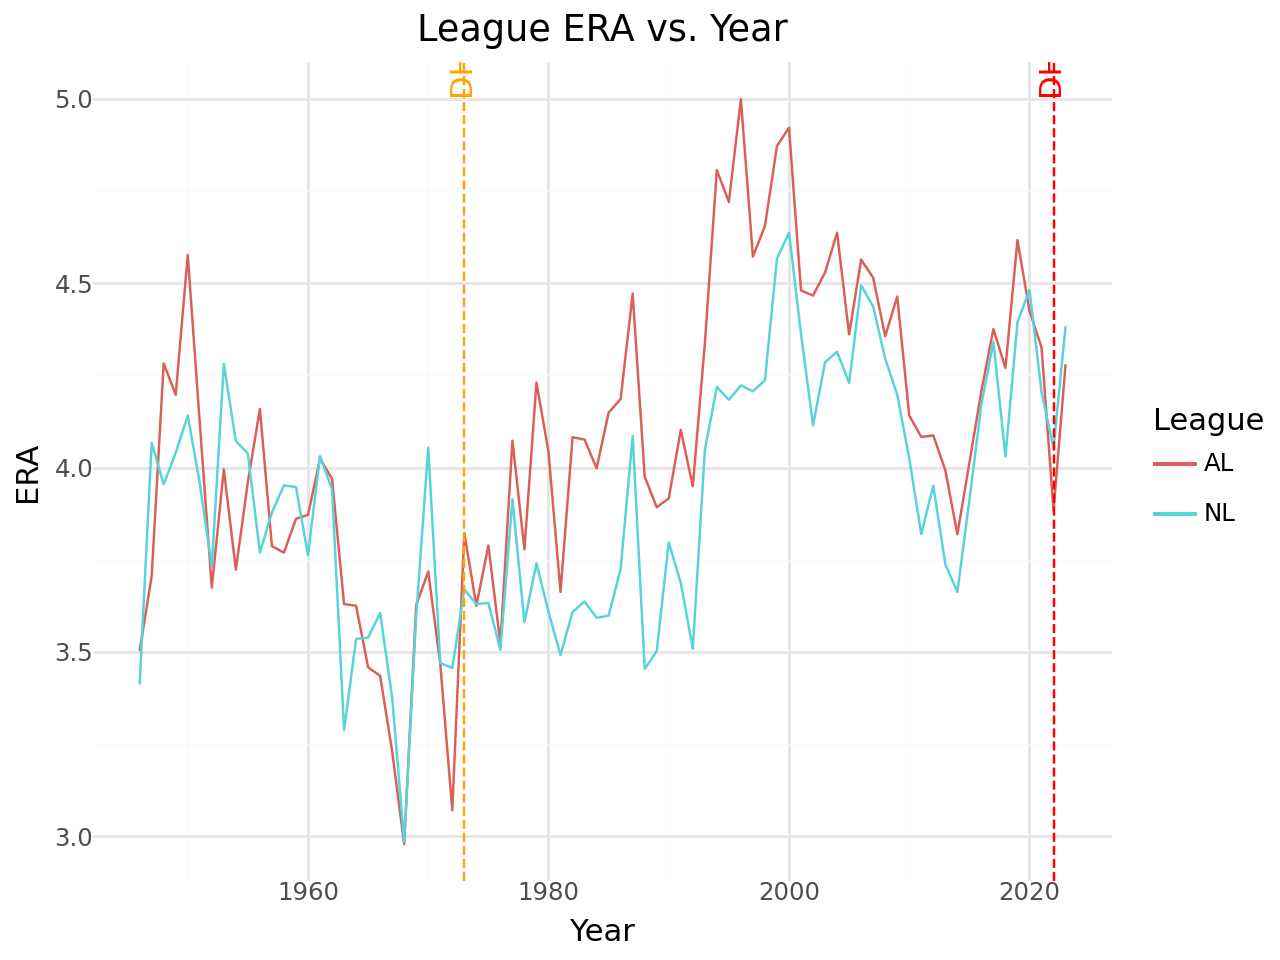

In [8]:
from plotnine import *
import pandas as pd


era_data = pd.read_csv('./Data/league_wide_ERA_with_DH.csv')


era_plot = (ggplot(era_data, aes(x='yearID', y='ERA', color='lgID')) +
            geom_line() +
            labs(title="League ERA vs. Year",
                 x="Year",
                 y="ERA",
                 color="League") +
            geom_vline(xintercept=1973, linetype='dashed', color='orange') +
            annotate('text', x=1973, y=5, label='DH introduced to AL in 1973', angle=90, va='bottom', color='orange') +
            geom_vline(xintercept=2022, linetype='dashed', color='red') +
            annotate('text', x=2022, y=5, label='DH introduced to NL in 2022', angle=90, va='bottom', color='red') +
            theme_minimal())


era_plot.save('./Data/league_era_plot.png')
print(era_plot)


In [10]:
pip install python-docx



   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/244.3 kB 435.7 kB/s eta 0:00:01
   ------------------------- -------------- 153.6/244.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 244.3/244.3 kB 1.5 MB/s eta 0:00:00


In [12]:

slg_data = pd.read_csv('./Data/league_wide_SLG_with_DH.csv')


slg_plot = (ggplot(slg_data, aes(x='yearID', y='SLG', color='lgID')) +
            geom_line() +
            labs(title="League SLG vs. Year",
                 x="Year",
                 y="Slugging Percentage",
                 color="League") +
            geom_vline(xintercept=1973, linetype='dashed', color='orange') +
            annotate('text', x=1973, y=0.45, label='DH introduced to AL in 1973', angle=90, va='bottom', color='orange') +
            geom_vline(xintercept=2022, linetype='dashed', color='red') +
            annotate('text', x=2022, y=0.45, label='DH introduced to NL in 2022', angle=90, va='bottom', color='red') +
            theme_minimal())


slg_plot.save('./Data/league_slg_plot.png')



C:\Users\at3571rj\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\at3571rj\AppData\Local\anaconda3\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: ./Data/league_slg_plot.png


In [ ]:
from docx import Document
from docx.shared import Inches


doc = Document()


doc.add_heading('MLB League-Wide ERA and Slugging Percentage Analysis', 0)


doc.add_heading('1. League-Wide ERA Over Time', level=1)


doc.add_paragraph(
    "This chart visualizes the trends in Earned Run Average (ERA) across "
    "the American League (AL) and National League (NL) from 1946 to present. "
    "The introduction of the Designated Hitter (DH) in the AL in 1973 is marked "
    "by a dashed line, and the extension of the DH to the NL in 2022 is also noted. "
    "The overall trend shows a consistent variation in ERA over time, with clear "
    "differences between the leagues, especially after the introduction of the DH rule."
)


doc.add_picture('./Data/league_era_plot.png', width=Inches(6))

# Add a subheading for SLG
doc.add_heading('2. League-Wide Slugging Percentage Over Time', level=1)


doc.add_paragraph(
    "This chart shows the trends in slugging percentage (SLG) across both leagues. "
    "Slugging percentage captures the total bases achieved per at-bat, reflecting the "
    "power-hitting capabilities of teams. Over time, slugging percentages have risen, "
    "with the introduction of the DH rule potentially contributing to higher offensive performances, "
    "especially in the AL. The introduction of the DH in the NL in 2022 might similarly impact future trends."
)

# Add the SLG image to the document
doc.add_picture('./Data/league_slg_plot.png', width=Inches(6))

# Save the document
doc.save('./Data/MLB_Analysis.docx')
